<a href="https://colab.research.google.com/github/younghoonNa/ML/blob/main/2022_Summer_mentoring/ML_week4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#내 구글 드라이브로 마운트
from google.colab import drive
path = '/content/drive'
drive.mount(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 시작

In [ ]:
path = "/content/drive/MyDrive/Kaggle_Spaceship-Titanic"
# /content/drive/MyDrive/Kaggle_Spaceship-Titanic

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv(path + '/train.csv')
train.head(3) # 앞의 5개

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [ ]:
train = train.drop(["PassengerId", "Name"], axis = 1)
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [ ]:
test = pd.read_csv(path + '/test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
submission = pd.read_csv(path + '/sample_submission.csv')
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [ ]:
# 숫자형 특성을 요약해줌
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


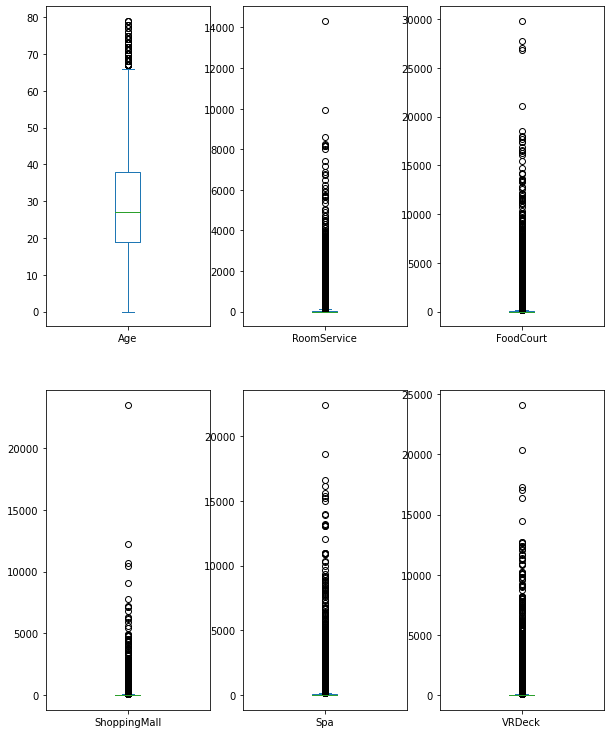

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

train.plot(kind='box', subplots=True, layout = (3,3), figsize = (10,20))
plt.show() 

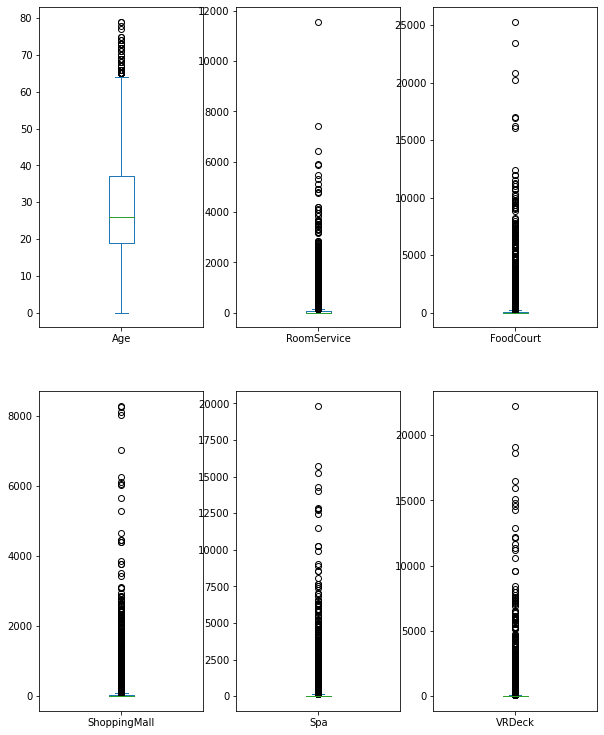

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

test.plot(kind='box', subplots=True, layout = (3,3), figsize = (10,20))
plt.show() 

In [ ]:
train['Age'].skew(), train['RoomService'].skew(), train['FoodCourt'].skew(), \
  train['ShoppingMall'].skew(), train['Spa'].skew(), train['VRDeck'].skew()

(0.41909658301471536,
 6.333014062092135,
 7.102227852514122,
 12.62756203889759,
 7.63601988471242,
 7.819731592048683)

In [ ]:
test['Age'].skew(), test['RoomService'].skew(), test['FoodCourt'].skew(), \
  test['ShoppingMall'].skew(), test['Spa'].skew(), test['VRDeck'].skew()

(0.48480028606763714,
 5.55838974945701,
 6.9106254394825735,
 6.824939059486591,
 7.690297860676392,
 8.38720995444892)

In [ ]:
train['RoomService'].mean(), test['RoomService'].mean()

(224.687617481203, 219.26626936829558)

In [ ]:
RoomService_train_Q1 =  train["RoomService"].quantile(0.25)
RoomService_train_Q3 =  train["RoomService"].quantile(0.75)
RoomService_train_IQR = RoomService_train_Q3 - RoomService_train_Q1

RoomService_test_Q1 =  test["RoomService"].quantile(0.25)
RoomService_test_Q3 =  test["RoomService"].quantile(0.75)
RoomService_test_IQR = RoomService_test_Q3 - RoomService_test_Q1

In [ ]:
train["RoomService"][train['RoomService'] >= RoomService_train_IQR * 1.5 + RoomService_train_Q3] \
           = train['RoomService'].mean()
test["RoomService"][test['RoomService'] >= RoomService_test_IQR * 1.5 + RoomService_test_Q3] \
           = test['RoomService'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train["RoomService"].mean(), test["RoomService"].mean()

(52.898220880230134, 51.6891954636955)

In [ ]:
train["RoomService"] = train["RoomService"].fillna(train["RoomService"].mean())
test["RoomService"] = test["RoomService"].fillna(test["RoomService"].mean())

In [ ]:
train['RoomService'].skew(), train['RoomService'].mean()

(1.3015672588476945, 52.89822088023012)

In [ ]:
test['RoomService'].skew(), test['RoomService'].mean()

(1.2981046676672898, 51.6891954636955)

In [ ]:
9 * 9, 10 * 10

(81, 100)

In [ ]:
train["RoomService"] = np.sqrt(train["RoomService"])
test["RoomService"] = np.sqrt(test["RoomService"])

In [ ]:
train['RoomService'].skew(), train['RoomService'].mean(), \
  test['RoomService'].skew(), test['RoomService'].mean()

(1.1127942418859833, 3.932304479646705, 1.0994197378114539, 3.9067607723078397)

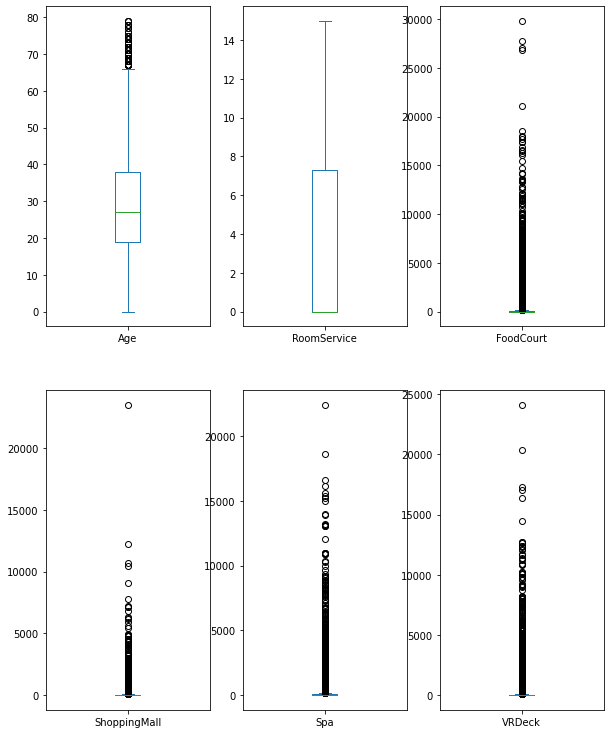

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

train.plot(kind='box', subplots=True, layout = (3,3), figsize = (10,20))
plt.show() 

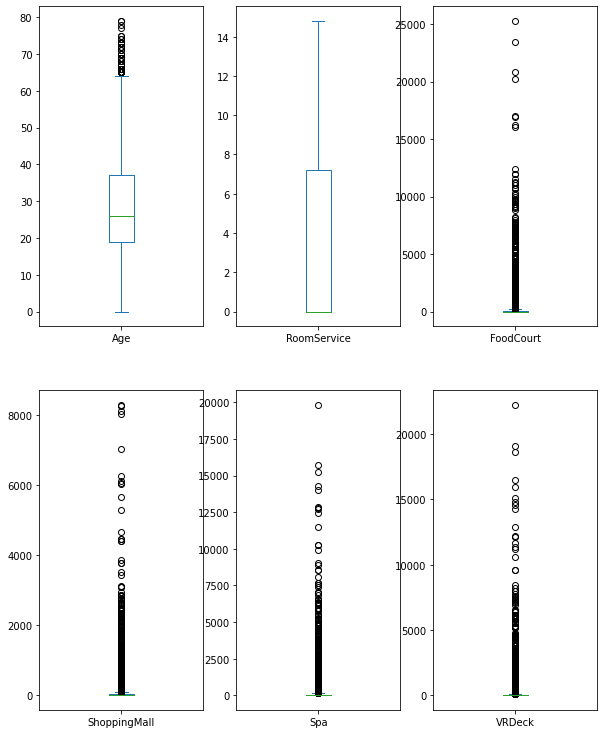

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

test.plot(kind='box', subplots=True, layout = (3,3), figsize = (10,20))
plt.show() 

## Age

In [ ]:
train['Age'].max(), train['Age'].min()

(79.0, 0.0)

In [ ]:
test['Age'].max(), test['Age'].min()

(79.0, 0.0)

#### Normalization -> X =  (X - 최솟값) / (최댓값 - 최솟값) -> 모든 데이터의 분포를 0부터 1까지로 만듬
#### Standardization -> X = (X - 평균) / 표준편차 -> 모든 데이터의 분포를 평균 0 표준편차 1로 만듬

In [ ]:
train['Age'] = (train['Age'] - train['Age'].min()) / (train['Age'].max() - train['Age'].min())
test['Age'] = (test['Age'] - test['Age'].min()) / (test['Age'].max() - test['Age'].min())

In [ ]:
train["Age"].skew()

0.41909658301471575

In [ ]:
test["Age"].skew()

0.4848002860676357

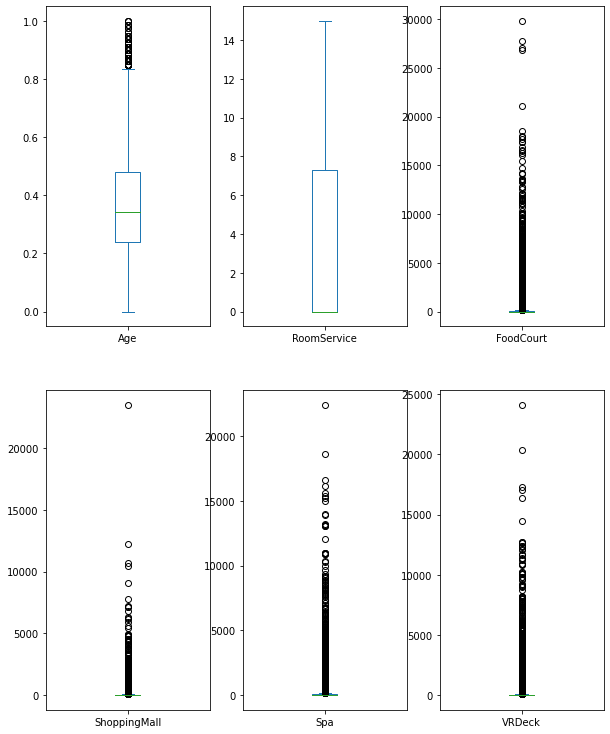

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

train.plot(kind='box', subplots=True, layout = (3,3), figsize = (10,20))
plt.show() 

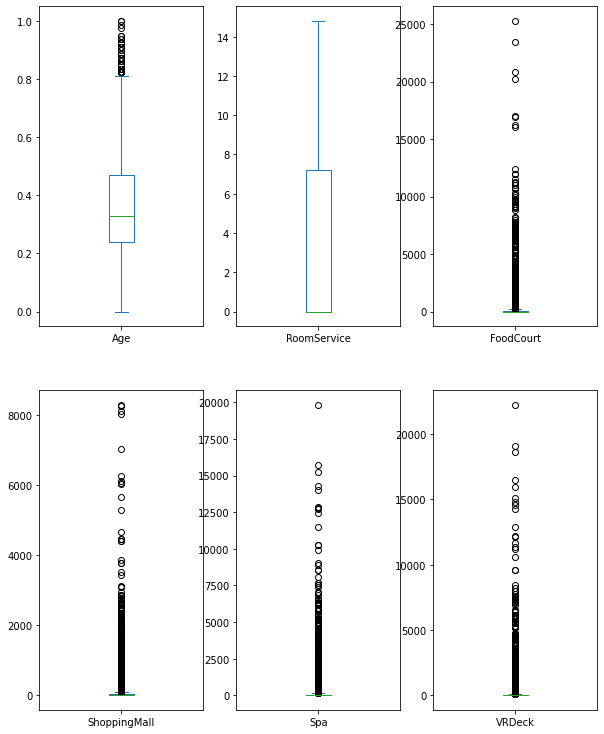

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

test.plot(kind='box', subplots=True, layout = (3,3), figsize = (10,20))
plt.show() 

## Shopping Mall

In [ ]:
ShoppingMall_train_Q1 =  train["ShoppingMall"].quantile(0.25)
ShoppingMall_train_Q3 =  train["ShoppingMall"].quantile(0.75)
ShoppingMall_train_IQR = ShoppingMall_train_Q3 - ShoppingMall_train_Q1

ShoppingMall_test_Q1 =  test["ShoppingMall"].quantile(0.25)
ShoppingMall_test_Q3 =  test["ShoppingMall"].quantile(0.75)
ShoppingMall_test_IQR = ShoppingMall_test_Q3 - ShoppingMall_test_Q1

In [ ]:
train["ShoppingMall"][train['ShoppingMall'] >= ShoppingMall_train_IQR * 1.5 + ShoppingMall_train_Q3] \
        = train['ShoppingMall'].mean()
test["ShoppingMall"][test['ShoppingMall'] >= ShoppingMall_test_IQR * 1.5 + ShoppingMall_train_IQR] \
       = test['ShoppingMall'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train["ShoppingMall"].skew(), test["ShoppingMall"].skew()

(1.3381062748690296, 1.3338535148873636)

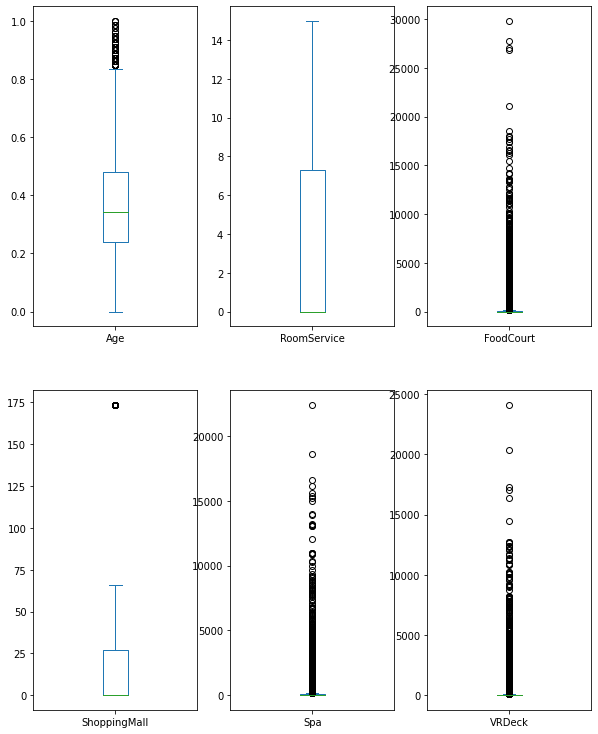

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

train.plot(kind='box', subplots=True, layout = (3,3), figsize = (10,20))
plt.show() 

In [ ]:
# train["ShoppingMall"][train['ShoppingMall'] >= ShoppingMall_train_IQR * 1.5 + ShoppingMall_train_Q3]

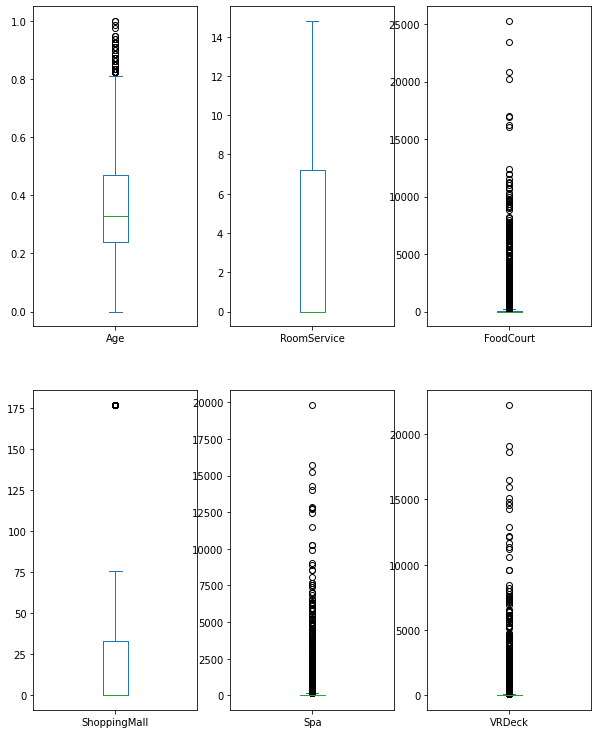

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

test.plot(kind='box', subplots=True, layout = (3,3), figsize = (10,20))
plt.show() 

In [ ]:
train["ShoppingMall"] = np.sqrt(train["ShoppingMall"])
test["ShoppingMall"] = np.sqrt(test["ShoppingMall"])

In [ ]:
train['ShoppingMall'].skew(), train['ShoppingMall'].std(), \
  test['ShoppingMall'].skew(), test['ShoppingMall'].std()

(1.1980230670223162, 5.36688671433028, 1.1788044983325963, 5.419728320508522)

## standardization

In [ ]:
train['ShoppingMall'] = (train['ShoppingMall'] - train['ShoppingMall'].mean()) / train['ShoppingMall'].std()
test['ShoppingMall'] = (test['ShoppingMall'] - test['ShoppingMall'].mean()) / test['ShoppingMall'].std()

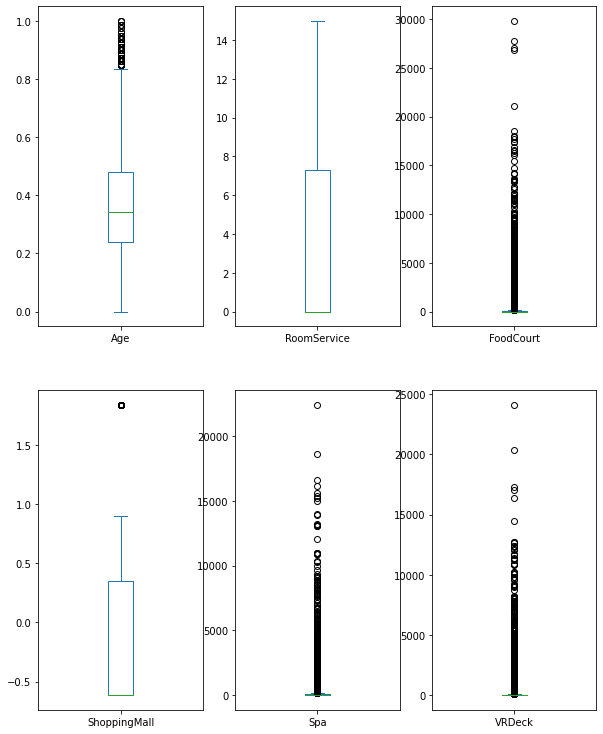

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

train.plot(kind='box', subplots=True, layout = (3,3), figsize = (10,20))
plt.show() 

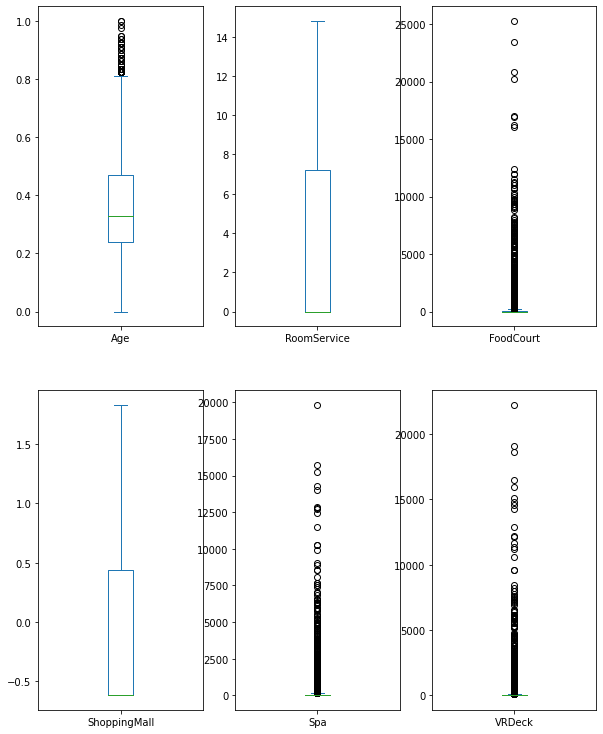

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

test.plot(kind='box', subplots=True, layout = (3,3), figsize = (10,20))
plt.show() 

In [ ]:
train['ShoppingMall'].std(), train['ShoppingMall'].mean(), train['ShoppingMall'].skew()

(1.0, 1.7585618681157458e-17, 1.1980230670223166)

In [ ]:
round(train['ShoppingMall'].mean(), 17)

2e-17

In [ ]:
test['ShoppingMall'].std(), test['ShoppingMall'].mean(), test['ShoppingMall'].skew()

(1.0, -6.631052092520677e-17, 1.1788044983325963)

## EDA

In [ ]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [ ]:
train['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [ ]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [ ]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [ ]:
train.isna()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
train.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [ ]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7df90c5050>,
      dtype=object)

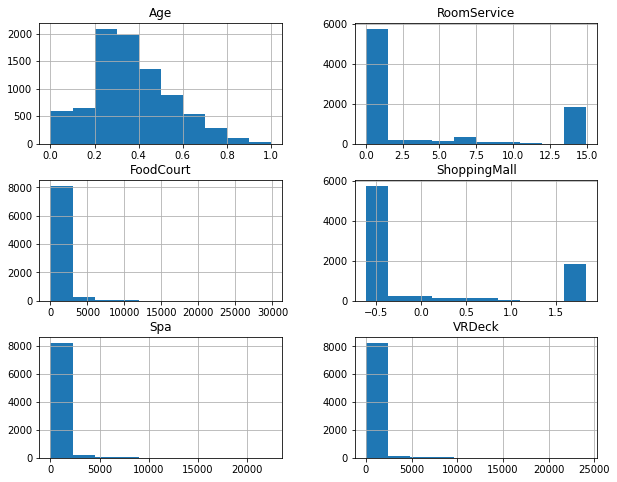

In [ ]:
train.hist(figsize = (10, 8)) # -> 숫자형 특성을 그림으로 시각화

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


## Data Preprocessing
- fillna()
- dropna()

In [ ]:
# train['Cabin'] = train['Cabin'].dropna()
 # -> 제거 안될 경우 뒤에 how = "any" or "all" 
# any -> 하나만 NaN 일 경우 제거
# all -> 모두 NaN 일 겨우 제거
# train['Cabin'] = train['Cabin'].dropna(axis = 0) 
# train['Cabin'].isna().value_counts()

In [ ]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [ ]:
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,0.493671,False,0.000000,0.0,-0.615468,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,0.303797,False,10.440307,9.0,0.316171,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,0.734177,True,6.557439,3576.0,-0.615468,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,0.417722,False,0.000000,1283.0,1.840450,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,0.202532,False,14.989584,70.0,1.840450,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,0.518987,True,0.000000,6819.0,-0.615468,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,0.227848,False,0.000000,0.0,-0.615468,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,0.329114,False,0.000000,0.0,1.840450,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,0.405063,False,0.000000,1049.0,-0.615468,353.0,3235.0,False


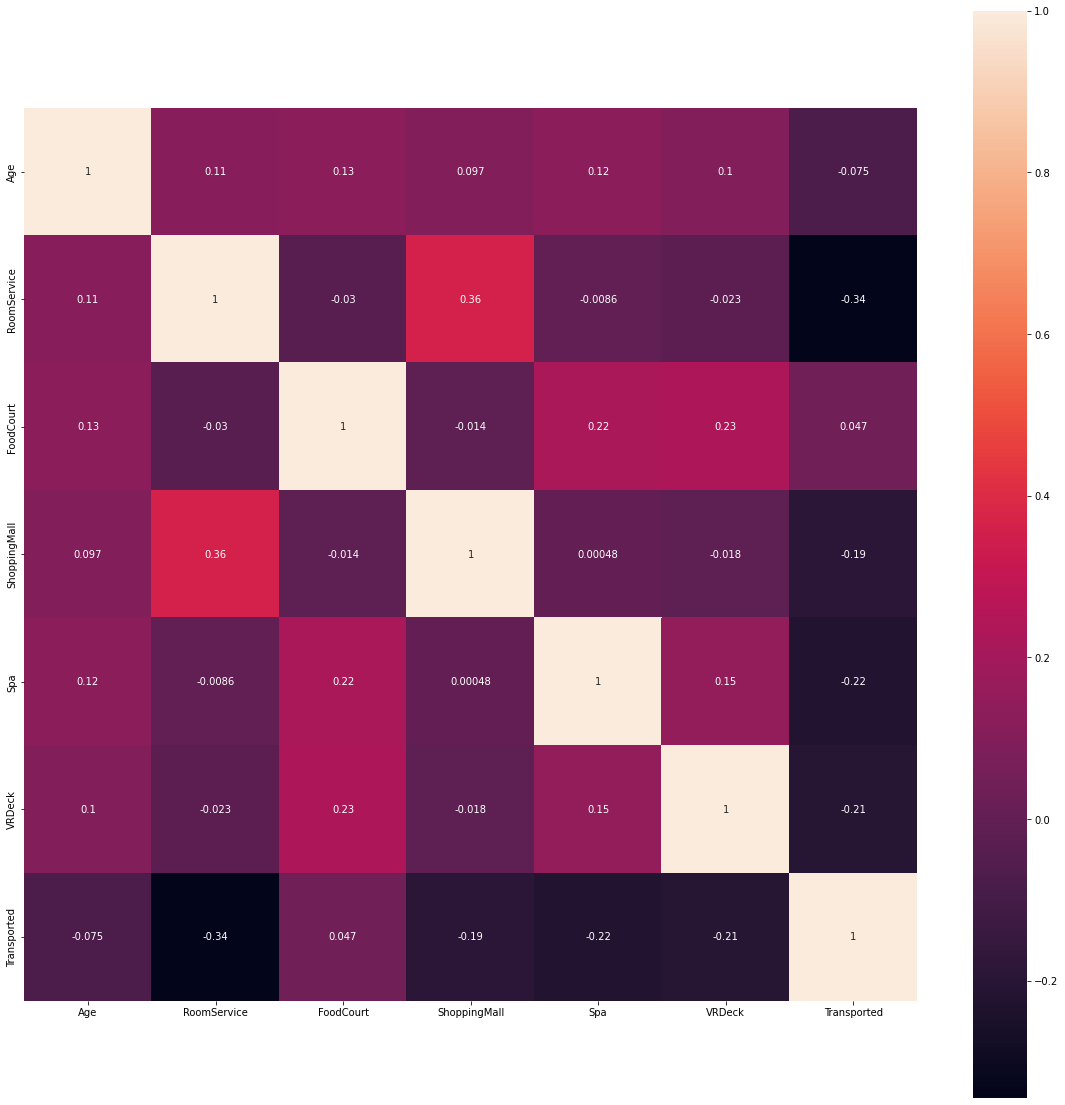

In [ ]:
import seaborn as sns
plt.subplots(figsize=(20,20))
sns.heatmap(train.corr(), mask=np.zeros_like(train.corr(), dtype=bool),
            square=True, annot=True)
plt.show()

## CryoSleep 먼저 보간 -> 이유는 bool형 이라 하기 편한

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [ ]:
train['CryoSleep'].isnull().sum()

217

In [ ]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [ ]:
train_of_CryoSleep = train[train['CryoSleep'].notna() == True]
train_of_CryoSleep

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,0.493671,False,0.000000,0.0,-0.615468,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,0.303797,False,10.440307,9.0,0.316171,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,0.734177,True,6.557439,3576.0,-0.615468,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,0.417722,False,0.000000,1283.0,1.840450,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,0.202532,False,14.989584,70.0,1.840450,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,0.518987,True,0.000000,6819.0,-0.615468,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,0.227848,False,0.000000,0.0,-0.615468,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,0.329114,False,0.000000,0.0,1.840450,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,0.405063,False,0.000000,1049.0,-0.615468,353.0,3235.0,False


In [ ]:
test_of_CryoSleep = train[train['CryoSleep'].isna() == True]
test_of_CryoSleep

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
92,Earth,NaN,G/12/P,TRAPPIST-1e,0.025316,False,0.000000,0.0,-0.615468,0.0,0.0,True
98,Earth,NaN,F/21/P,TRAPPIST-1e,0.341772,False,0.000000,0.0,1.840450,2.0,131.0,False
104,Europa,NaN,B/5/P,TRAPPIST-1e,0.506329,False,0.000000,331.0,-0.615468,0.0,1687.0,False
111,Mars,NaN,F/24/P,TRAPPIST-1e,0.329114,False,0.000000,0.0,-0.615468,0.0,NaN,True
152,Earth,NaN,E/11/S,TRAPPIST-1e,0.734177,False,0.000000,985.0,-0.615468,5.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8620,Europa,NaN,C/308/P,55 Cancri e,0.556962,False,0.000000,0.0,-0.615468,0.0,0.0,True
8651,Earth,NaN,G/1498/P,TRAPPIST-1e,0.101266,False,0.000000,0.0,-0.615468,0.0,0.0,False
8664,Earth,NaN,G/1490/S,TRAPPIST-1e,0.405063,False,0.000000,0.0,-0.615468,0.0,0.0,True
8675,Earth,NaN,F/1893/P,TRAPPIST-1e,0.556962,False,14.989584,1015.0,-0.615468,11.0,NaN,True


In [ ]:
train_of_CryoSleep['CryoSleep'] =  train_of_CryoSleep['CryoSleep'].astype('bool')
train_of_CryoSleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8476 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8277 non-null   object 
 1   CryoSleep     8476 non-null   bool   
 2   Cabin         8284 non-null   object 
 3   Destination   8298 non-null   object 
 4   Age           8298 non-null   float64
 5   VIP           8280 non-null   object 
 6   RoomService   8476 non-null   float64
 7   FoodCourt     8296 non-null   float64
 8   ShoppingMall  8276 non-null   float64
 9   Spa           8298 non-null   float64
 10  VRDeck        8295 non-null   float64
 11  Transported   8476 non-null   bool   
dtypes: bool(2), float64(6), object(4)
memory usage: 745.0+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


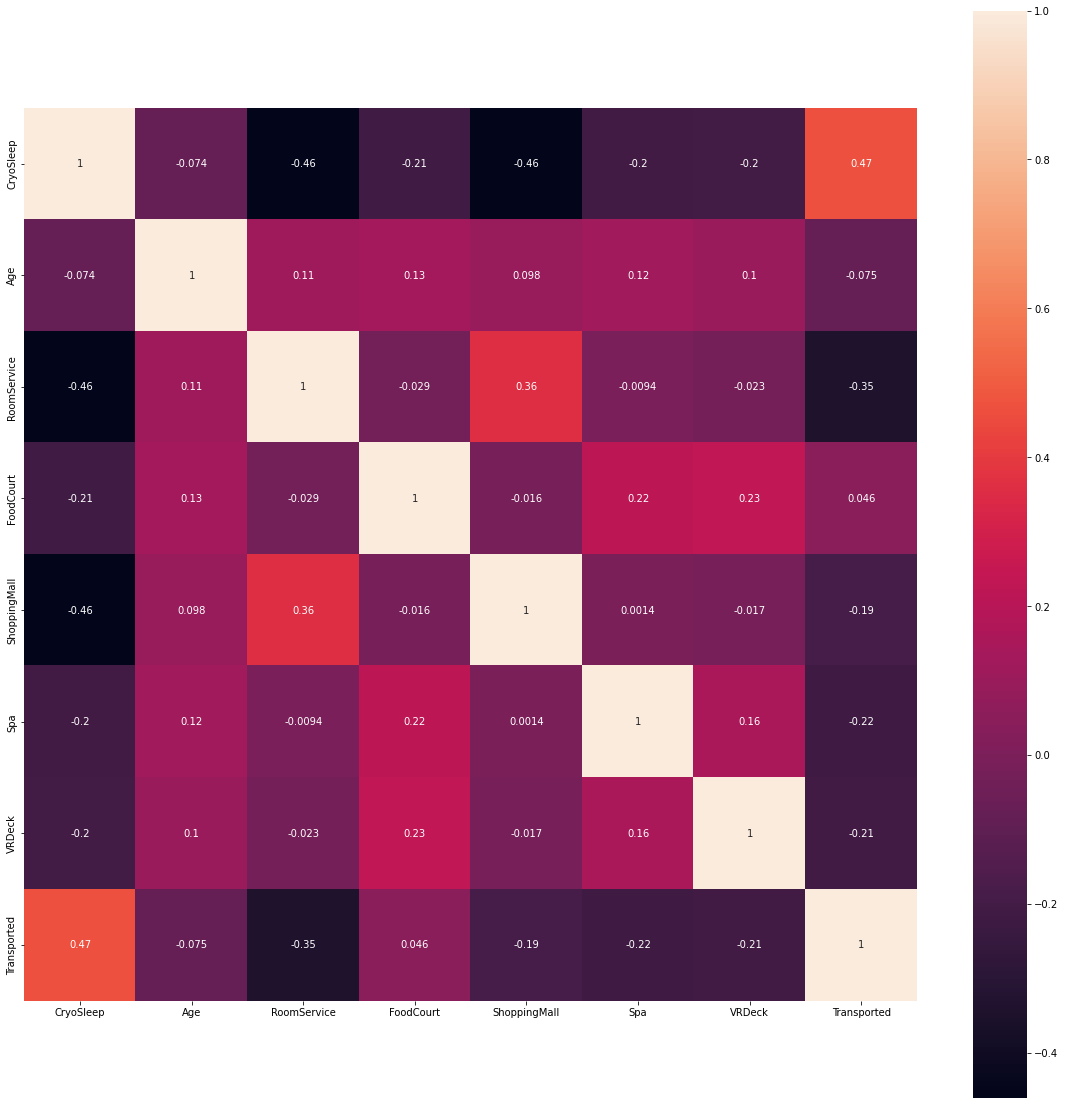

In [ ]:
import seaborn as sns
plt.subplots(figsize=(20,20))
sns.heatmap(train_of_CryoSleep.corr(), mask=np.zeros_like(train_of_CryoSleep.corr(), dtype=bool),
            square=True, annot=True)
plt.show()

In [ ]:
train_of_CryoSleep.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [ ]:
features_CryoSleep = [
    'RoomService',
    # 'Transported',
    'Spa',
    'FoodCourt',
    'ShoppingMall',
    'VRDeck'
]

features_CryoSleep

['RoomService', 'Spa', 'FoodCourt', 'ShoppingMall', 'VRDeck']

In [ ]:
train_of_CryoSleep = train_of_CryoSleep.dropna()
train_of_CryoSleep

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,0.493671,False,0.000000,0.0,-0.615468,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,0.303797,False,10.440307,9.0,0.316171,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,0.734177,True,6.557439,3576.0,-0.615468,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,0.417722,False,0.000000,1283.0,1.840450,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,0.202532,False,14.989584,70.0,1.840450,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,0.518987,True,0.000000,6819.0,-0.615468,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,0.227848,False,0.000000,0.0,-0.615468,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,0.329114,False,0.000000,0.0,1.840450,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,0.405063,False,0.000000,1049.0,-0.615468,353.0,3235.0,False


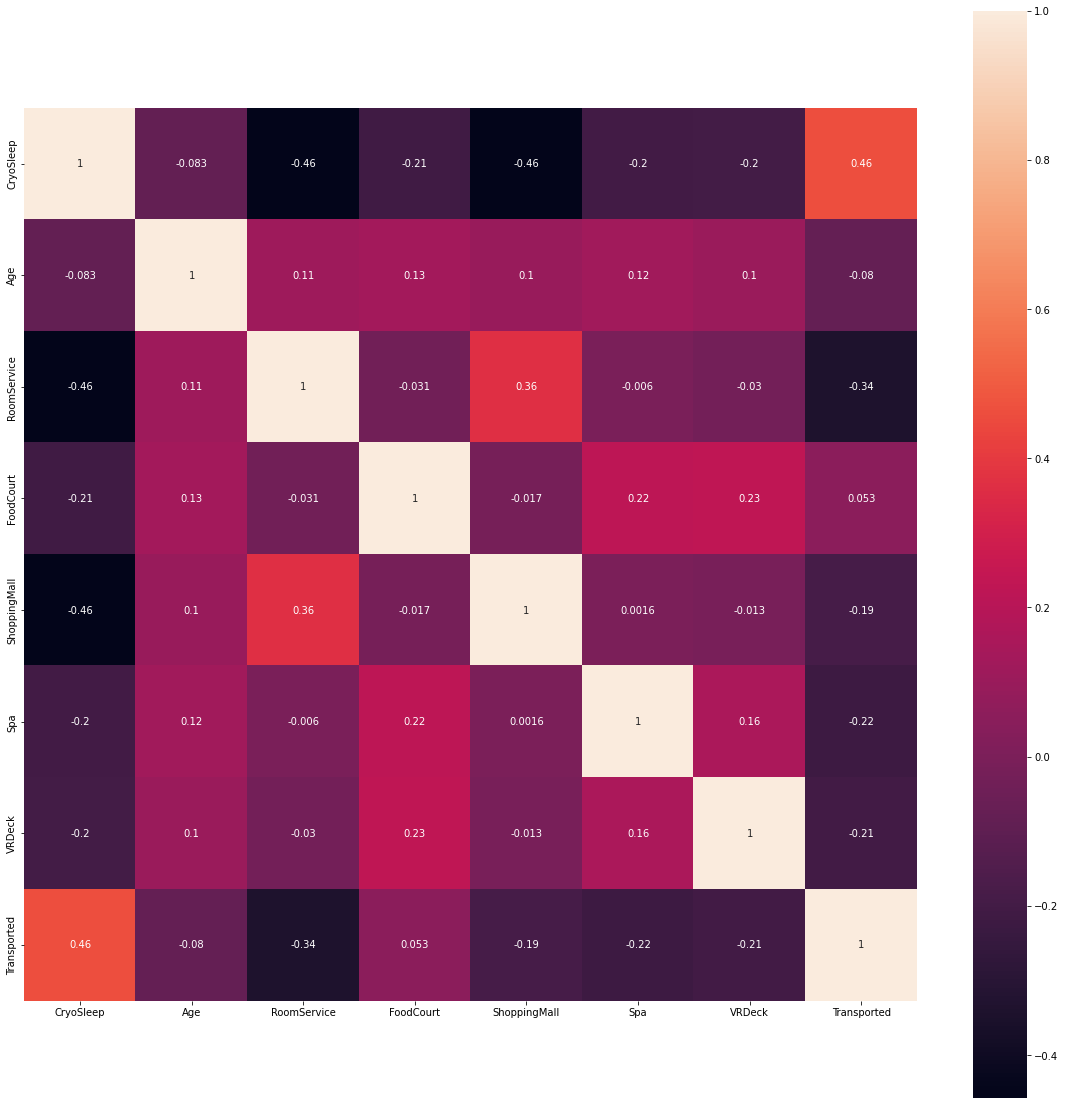

In [ ]:
import seaborn as sns
plt.subplots(figsize=(20,20))
sns.heatmap(train_of_CryoSleep.corr(), mask=np.zeros_like(train_of_CryoSleep.corr(), dtype=bool),
            square=True, annot=True)
plt.show()

In [ ]:
ToC =  train_of_CryoSleep[features_CryoSleep]
ToC

,RoomService,Spa,FoodCourt,ShoppingMall,VRDeck
0,0.000000,0.0,0.0,-0.615468,0.0
1,10.440307,549.0,9.0,0.316171,44.0
2,6.557439,6715.0,3576.0,-0.615468,49.0
3,0.000000,3329.0,1283.0,1.840450,193.0
4,14.989584,565.0,70.0,1.840450,2.0
...,...,...,...,...,...
8688,0.000000,1643.0,6819.0,-0.615468,74.0
8689,0.000000,0.0,0.0,-0.615468,0.0
8690,0.000000,1.0,0.0,1.840450,0.0
8691,0.000000,353.0,1049.0,-0.615468,3235.0


In [ ]:
train_CryoSleep = train_of_CryoSleep['CryoSleep']
train_CryoSleep

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 6914, dtype: bool

In [ ]:
train_CryoSleep.value_counts()

False    4477
True     2437
Name: CryoSleep, dtype: int64

In [ ]:
# https://grsahagian.medium.com/what-is-random-state-42-d803402ee76b 
# 데이터 분석시 random_state = 42를 쓰는데 이에대한 이유 
# 궁금하신분들만 들어가서 한번씩 읽으면 좋을 것 같습니다.
from sklearn.model_selection import train_test_split
x_train_cryo, x_test_cryo, y_train_cryo, y_test_cryo = train_test_split(ToC, train_CryoSleep, random_state=42, test_size=0.1, stratify= train_CryoSleep)

In [ ]:
x_train_cryo, x_test_cryo, y_train_cryo, y_test_cryo

(      RoomService    Spa  FoodCourt  ShoppingMall  VRDeck
 7277     0.000000  778.0      180.0     -0.615468  4973.0
 4035     0.000000    0.0        0.0     -0.615468     0.0
 1826    14.989584    0.0        0.0      1.840450     0.0
 8342     0.000000  782.0        3.0     -0.615468     7.0
 2613     0.000000    0.0        0.0     -0.615468  1345.0
 ...           ...    ...        ...           ...     ...
 6820    14.989584    1.0     1319.0      0.592074   444.0
 5056    14.989584  580.0        0.0      1.840450     0.0
 6104     0.000000    0.0        0.0     -0.615468     0.0
 4791     0.000000    0.0        0.0     -0.615468     0.0
 7181     7.273116   37.0      636.0      1.840450     0.0
 
 [6222 rows x 5 columns],
       RoomService     Spa  FoodCourt  ShoppingMall  VRDeck
 4741     0.000000    20.0      867.0     -0.615468  1371.0
 6625     0.000000   186.0     4340.0     -0.615468     0.0
 4761     0.000000     0.0        0.0     -0.615468     0.0
 5749     0.000000     0

In [ ]:
y_test_cryo[y_test_cryo == True], y_test_cryo[y_test_cryo == False]

(4761    True
 5749    True
 5660    True
 7795    True
 5354    True
         ... 
 8584    True
 3488    True
 6031    True
 3487    True
 491     True
 Name: CryoSleep, Length: 244, dtype: bool, 4741    False
 6625    False
 6762    False
 8682    False
 5707    False
         ...  
 940     False
 2421    False
 4725    False
 6817    False
 7630    False
 Name: CryoSleep, Length: 448, dtype: bool)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

models=[RandomForestClassifier(), KNeighborsClassifier(), BaggingClassifier(), GradientBoostingClassifier(), XGBClassifier(), LGBMClassifier(),
        AdaBoostClassifier(),  SVC(), SGDClassifier()
        ]
     
model_names=['RandomForest', 'KNeighbors', 'Bagging', 'GradientBoosting', 'XGB', 'LGBM',
             'AdaBoost', 'SVC', "SGD"
          ]

for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train_cryo, y_train_cryo)
    test_pred=clf.predict(x_test_cryo)

    acc = 0 
    total = 0
    for pred, y_test_1 in zip(test_pred, y_test_cryo):

      if (pred == y_test_1):
        acc += 1
      total+= 1

    print(models[model], ":", acc/total * 100)

RandomForestClassifier() : 94.21965317919076
KNeighborsClassifier() : 65.17341040462428
BaggingClassifier() : 94.21965317919076
GradientBoostingClassifier() : 94.21965317919076
XGBClassifier() : 94.21965317919076
LGBMClassifier() : 94.21965317919076
AdaBoostClassifier() : 94.21965317919076
SVC() : 79.47976878612717
SGDClassifier() : 93.64161849710982


In [ ]:
# from xgboost import XGBClassifier
model_na_xgb = XGBClassifier().fit(ToC, train_CryoSleep)
model_na_xgb.predict(test_of_CryoSleep[features_CryoSleep])

array([ True, False, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True, False,  True, False, False, False, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False,  True, False, False,  True,
        True, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True,  True,  True, False,  True, False,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False,

In [ ]:
pred_cryo_nan =  model_na_xgb.predict(test_of_CryoSleep[features_CryoSleep])
pred_cryo_nan, pred_cryo_nan.shape

(array([ True, False, False,  True, False,  True, False,  True, False,
         True, False, False, False,  True, False,  True,  True,  True,
         True,  True,  True, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False,  True, False,  True,
         True,  True, False,  True,  True,  True,  True, False,  True,
         True, False,  True, False, False, False, False,  True,  True,
        False,  True,  True,  True, False,  True,  True,  True, False,
        False, False,  True,  True, False,  True, False, False,  True,
         True, False,  True, False, False,  True, False, False,  True,
        False, False, False, False, False,  True,  True, False, False,
        False, False,  True,  True,  True, False,  True, False,  True,
        False, False, False,  True,  True,  True,  True, False,  True,
      

In [ ]:
pred_cryo_nan[pred_cryo_nan == True].shape, pred_cryo_nan[pred_cryo_nan == False].shape

((98,), (119,))

In [ ]:
cryo_nan_idx = train[train['CryoSleep'].isna() == True]['CryoSleep'].index
cryo_nan_idx

Int64Index([  92,   98,  104,  111,  152,  175,  224,  266,  314,  392,
            ...
            8420, 8455, 8501, 8591, 8612, 8620, 8651, 8664, 8675, 8687],
           dtype='int64', length=217)

In [ ]:
for idx, pred in zip(cryo_nan_idx, pred_cryo_nan):
  train.loc[idx,'CryoSleep'] = pred

In [ ]:
train.isnull().sum()

HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [ ]:
train['CryoSleep'].value_counts()

False    5558
True     3135
Name: CryoSleep, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 8492 non-null   object 
 1   CryoSleep                  8693 non-null   bool   
 2   Destination                8693 non-null   object 
 3   Age                        8693 non-null   float64
 4   VIP                        8693 non-null   object 
 5   RoomService                8693 non-null   float64
 6   FoodCourt                  8693 non-null   float64
 7   ShoppingMall               8693 non-null   float64
 8   Spa                        8693 non-null   float64
 9   VRDeck                     8693 non-null   float64
 10  Transported                8693 non-null   bool   
 11  Cabin_first                8693 non-null   object 
 12  Cabin_second               8693 non-null   float64
 13  Cabin_third                8693 non-null   objec

In [ ]:
train['CryoSleep'] = train['CryoSleep'].astype('bool')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 8492 non-null   object 
 1   CryoSleep                  8693 non-null   bool   
 2   Destination                8693 non-null   object 
 3   Age                        8693 non-null   float64
 4   VIP                        8693 non-null   object 
 5   RoomService                8693 non-null   float64
 6   FoodCourt                  8693 non-null   float64
 7   ShoppingMall               8693 non-null   float64
 8   Spa                        8693 non-null   float64
 9   VRDeck                     8693 non-null   float64
 10  Transported                8693 non-null   bool   
 11  Cabin_first                8693 non-null   object 
 12  Cabin_second               8693 non-null   float64
 13  Cabin_third                8693 non-null   objec

In [ ]:
train['CryoSleep'].value_counts()

False    5558
True     3135
Name: CryoSleep, dtype: int64

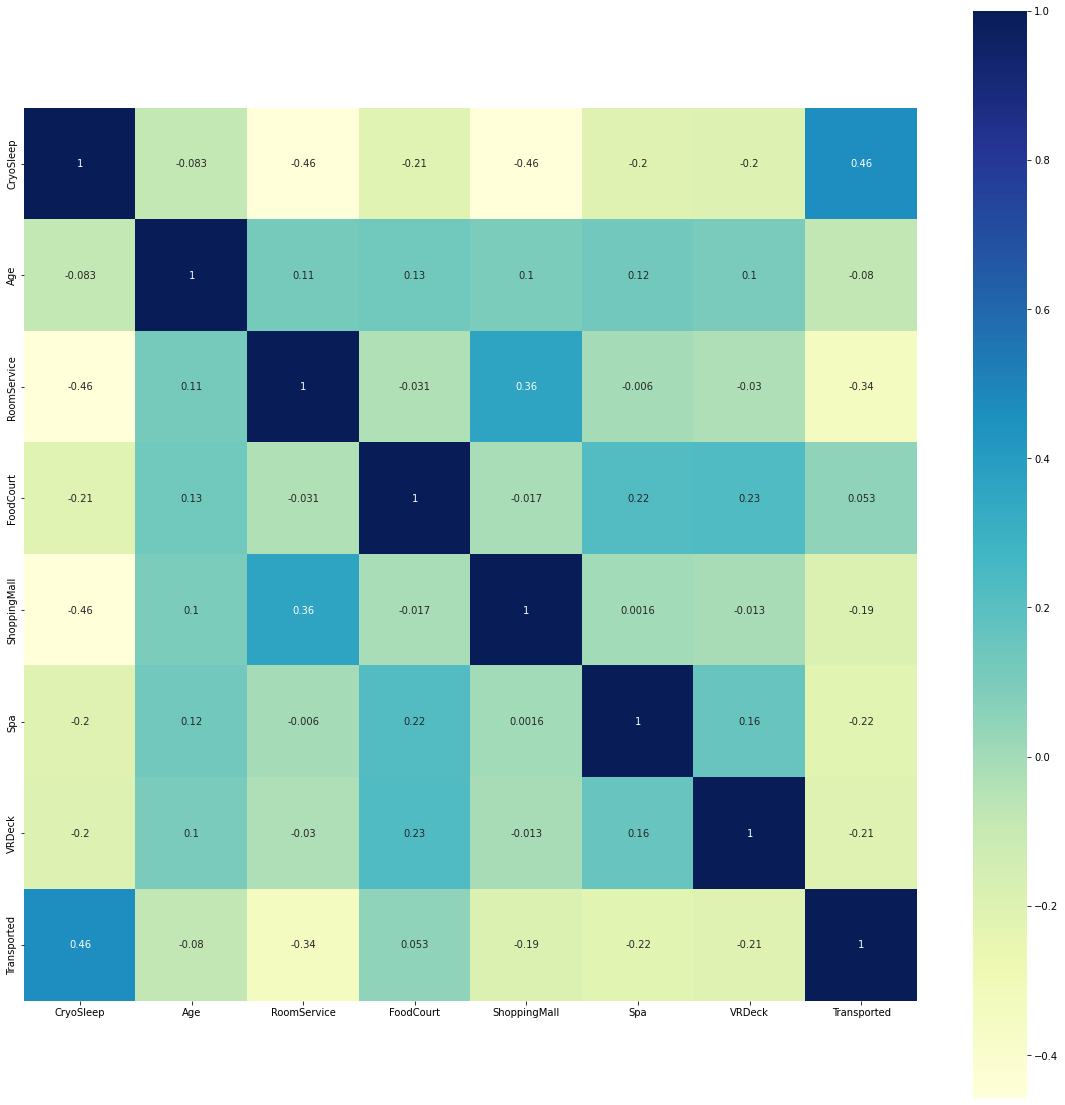

In [ ]:
import seaborn as sns
plt.subplots(figsize=(20,20))
sns.heatmap(train_of_CryoSleep.corr(), mask=np.zeros_like(train_of_CryoSleep.corr(), dtype=bool),
            square=True, annot=True, cmap="YlGnBu")
plt.show()

### Test Data에 대해서도 똑같이 진행

In [ ]:
test_cryo = test[test['CryoSleep'].isna() == True][features_CryoSleep]
test_cryo

,RoomService,Spa,FoodCourt,ShoppingMall,VRDeck
68,0.00000,0.0,0.0,-0.620918,0.0
78,0.00000,0.0,0.0,-0.620918,0.0
92,6.63325,0.0,0.0,1.835891,18.0
99,0.00000,0.0,0.0,-0.620918,0.0
165,0.00000,3490.0,1030.0,-0.620918,5832.0
...,...,...,...,...,...
3995,0.00000,0.0,0.0,-0.620918,0.0
4108,0.00000,2582.0,2182.0,-0.132748,19.0
4209,0.00000,1023.0,1998.0,-0.620918,867.0
4230,0.00000,1377.0,0.0,NaN,29.0


In [ ]:
test_idx_cryo = test_cryo.index
test_idx_cryo

Int64Index([  68,   78,   92,   99,  165,  265,  331,  383,  389,  454,  509,
             527,  754,  755,  800,  815,  898, 1042, 1054, 1124, 1144, 1159,
            1206, 1241, 1297, 1298, 1339, 1366, 1376, 1421, 1559, 1567, 1695,
            1794, 1809, 1896, 1992, 2026, 2048, 2055, 2156, 2204, 2209, 2280,
            2291, 2325, 2359, 2435, 2450, 2486, 2518, 2523, 2526, 2588, 2605,
            2650, 2742, 2752, 2859, 2878, 2880, 2919, 2932, 2939, 3006, 3009,
            3036, 3100, 3133, 3150, 3165, 3177, 3199, 3253, 3299, 3329, 3389,
            3398, 3448, 3496, 3511, 3537, 3602, 3625, 3798, 3858, 3916, 3955,
            3995, 4108, 4209, 4230, 4239],
           dtype='int64')

In [ ]:
pred_test_cryo_nan =  model_na_xgb.predict(test_cryo)
pred_test_cryo_nan, pred_test_cryo_nan.shape

(array([ True,  True, False,  True, False,  True, False,  True,  True,
        False,  True,  True, False, False,  True, False, False,  True,
        False, False,  True,  True, False,  True, False, False,  True,
        False, False, False, False, False,  True,  True, False,  True,
         True, False, False,  True,  True, False,  True,  True, False,
        False, False,  True, False,  True,  True,  True, False,  True,
        False, False, False, False, False, False,  True, False,  True,
         True, False, False,  True, False, False,  True,  True, False,
        False,  True,  True, False, False, False, False, False, False,
        False,  True, False, False, False, False, False,  True, False,
        False, False,  True]), (93,))

In [ ]:
for idx, pred in zip(test_idx_cryo, pred_test_cryo_nan):
  test.loc[idx,'CryoSleep'] = pred

In [ ]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep         0
Cabin           100
Destination      92
Age              91
VIP              93
RoomService       0
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## VIP 보간

In [ ]:
train['VIP'].isnull().sum()

203

In [ ]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [ ]:
Train_of_VIP =  train[train['VIP'].notna() == True]
Test_of_VIP =  train[train['VIP'].isna() == True]

Train_of_VIP.shape, Test_of_VIP.shape

((8490, 12), (203, 12))

In [ ]:
Train_of_VIP["VIP"] = Train_of_VIP['VIP'].astype(bool)
Train_of_VIP

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,0.493671,False,0.000000,0.0,-0.615468,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,0.303797,False,10.440307,9.0,0.316171,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,0.734177,True,6.557439,3576.0,-0.615468,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,0.417722,False,0.000000,1283.0,1.840450,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,0.202532,False,14.989584,70.0,1.840450,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,0.518987,True,0.000000,6819.0,-0.615468,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,0.227848,False,0.000000,0.0,-0.615468,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,0.329114,False,0.000000,0.0,1.840450,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,0.405063,False,0.000000,1049.0,-0.615468,353.0,3235.0,False


In [ ]:
Train_of_VIP.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,1.000000,-0.078538,-0.082121,-0.462176,-0.213694,-0.459566,-0.204923,-0.199949,0.470461
Age,-0.078538,1.000000,0.092819,0.112041,0.132325,0.096732,0.123395,0.099630,-0.074559
VIP,-0.082121,0.092819,1.000000,0.044254,0.129799,0.032115,0.061059,0.125974,-0.037650
RoomService,-0.462176,0.112041,0.044254,1.000000,-0.030227,0.361521,-0.009814,-0.024275,-0.344643
FoodCourt,-0.213694,0.132325,0.129799,-0.030227,1.000000,-0.014664,0.222174,0.229611,0.046343
ShoppingMall,-0.459566,0.096732,0.032115,0.361521,-0.014664,1.000000,-0.001044,-0.018482,-0.189415
Spa,-0.204923,0.123395,0.061059,-0.009814,0.222174,-0.001044,1.000000,0.154483,-0.220292
VRDeck,-0.199949,0.099630,0.125974,-0.024275,0.229611,-0.018482,0.154483,1.000000,-0.207528
Transported,0.470461,-0.074559,-0.037650,-0.344643,0.046343,-0.189415,-0.220292,-0.207528,1.000000


## HomePlanet Data 보간

In [ ]:
train['HomePlanet'].isnull().sum()

201

In [ ]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
## 기존 방식
# train['HomePlanet'] = train['HomePlanet'].fillna("Earth") # fillna를 통해 최빈값인 Earth로 채움.
(train['HomePlanet'].isna() == True).value_counts()

False    8492
True      201
Name: HomePlanet, dtype: int64

In [ ]:
Train_of_HP =  train[train['HomePlanet'].notna() == True]
Test_of_HP =  train[train['HomePlanet'].isna() == True]

Train_of_HP.shape, Test_of_HP.shape

((8492, 12), (201, 12))

In [ ]:
HP_dummmies = pd.get_dummies(Train_of_HP['HomePlanet'], prefix = 'HomePlanet')

Train_of_HP_corr = pd.concat((Train_of_HP, HP_dummmies), axis=1)

In [ ]:
Train_of_HP_corr.corr()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
CryoSleep,1.000000,-0.080188,-0.463610,-0.213260,-0.459967,-0.206367,-0.199150,0.465329,-0.112873,0.097939,0.033993
Age,-0.080188,1.000000,0.113179,0.130749,0.094675,0.123990,0.101896,-0.078290,-0.207624,0.223228,0.016487
RoomService,-0.463610,0.113179,1.000000,-0.030451,0.360576,-0.010449,-0.022892,-0.345238,-0.038377,-0.213175,0.275246
FoodCourt,-0.213260,0.130749,-0.030451,1.000000,-0.014513,0.222284,0.226839,0.047085,-0.217731,0.370161,-0.128306
ShoppingMall,-0.459967,0.094675,0.360576,-0.014513,1.000000,-0.000316,-0.016080,-0.188488,0.012307,-0.190481,0.188341
Spa,-0.206367,0.123990,-0.010449,0.222284,-0.000316,1.000000,0.154300,-0.222174,-0.162599,0.272031,-0.091098
VRDeck,-0.199150,0.101896,-0.022892,0.226839,-0.016080,0.154300,1.000000,-0.207080,-0.157612,0.287725,-0.114497
Transported,0.465329,-0.078290,-0.345238,0.047085,-0.188488,-0.222174,-0.207080,1.000000,-0.172876,0.179931,0.020046
HomePlanet_Earth,-0.112873,-0.207624,-0.038377,-0.217731,0.012307,-0.162599,-0.157612,-0.172876,1.000000,-0.629546,-0.555939
HomePlanet_Europa,0.097939,0.223228,-0.213175,0.370161,-0.190481,0.272031,0.287725,0.179931,-0.629546,1.000000,-0.295841


### DropNA

In [ ]:
# train = train.dropna()
# train.isnull().sum()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(4)
memory usage: 696.2+ KB


## Imputer

In [ ]:
train[["Destination", "VIP"]]

,Destination,VIP
0,TRAPPIST-1e,False
1,TRAPPIST-1e,False
2,TRAPPIST-1e,True
3,TRAPPIST-1e,False
4,TRAPPIST-1e,False
...,...,...
8688,55 Cancri e,True
8689,PSO J318.5-22,False
8690,TRAPPIST-1e,False
8691,55 Cancri e,False


In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
train[["Destination", "VIP"]] = imp.fit_transform(train[["Destination", "VIP"]])

In [ ]:
train.isnull().sum()

HomePlanet      201
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP               0
RoomService       0
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values= np.nan, strategy='mean')
train[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = imp.fit_transform(train[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])

In [ ]:
train.isnull().sum()

HomePlanet      201
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

## Feature Engineering

In [ ]:
cnt = 0
train["Cabin_first"] = 0
train["Cabin_second"] = 0
train["Cabin_third"] = 0

for element in train["Cabin"]:
  if element is np.NaN:
    train['Cabin_first'][cnt] = np.NaN
    train['Cabin_second'][cnt] = np.NaN
    train['Cabin_third'][cnt] = np.NaN
    cnt+=1
    continue

  train['Cabin_first'][cnt] = element.split('/')[0]
  train['Cabin_second'][cnt] = element.split('/')[1]
  train['Cabin_third'][cnt] = element.split('/')[2]
  cnt += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/li

In [ ]:
train['Cabin_first'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_first, dtype: int64

In [ ]:
train['Cabin_second'].value_counts()

82.0      28
86.0      22
19.0      22
56.0      21
176.0     21
          ..
1644.0     1
1515.0     1
1639.0     1
1277.0     1
1894.0     1
Name: Cabin_second, Length: 1817, dtype: int64

In [ ]:
train['Cabin_third'].value_counts()

S    4288
P    4206
Name: Cabin_third, dtype: int64

In [ ]:
train = train.drop('Cabin', axis = 1)
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_first,Cabin_second,Cabin_third
0,Europa,False,TRAPPIST-1e,0.493671,False,0.000000,0.0,-0.615468,0.0,0.0,False,B,0.0,P
1,Earth,False,TRAPPIST-1e,0.303797,False,10.440307,9.0,0.316171,549.0,44.0,True,F,0.0,S
2,Europa,False,TRAPPIST-1e,0.734177,True,6.557439,3576.0,-0.615468,6715.0,49.0,False,A,0.0,S
3,Europa,False,TRAPPIST-1e,0.417722,False,0.000000,1283.0,1.840450,3329.0,193.0,False,A,0.0,S
4,Earth,False,TRAPPIST-1e,0.202532,False,14.989584,70.0,1.840450,565.0,2.0,True,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,0.518987,True,0.000000,6819.0,-0.615468,1643.0,74.0,False,A,98.0,P
8689,Earth,True,PSO J318.5-22,0.227848,False,0.000000,0.0,-0.615468,0.0,0.0,False,G,1499.0,S
8690,Earth,False,TRAPPIST-1e,0.329114,False,0.000000,0.0,1.840450,1.0,0.0,True,G,1500.0,S
8691,Europa,False,55 Cancri e,0.405063,False,0.000000,1049.0,-0.615468,353.0,3235.0,False,E,608.0,S


In [ ]:
train.isnull().sum()

HomePlanet      201
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Cabin_first     199
Cabin_second    199
Cabin_third     199
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values= np.nan, strategy='mean')
train[["Cabin_second"]] = imp.fit_transform(train[["Cabin_second"]])

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
train[["Cabin_first", "Cabin_third"]] = imp.fit_transform(train[["Cabin_first", "Cabin_third"]])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Cabin_first   8693 non-null   object 
 12  Cabin_second  8693 non-null   float64
 13  Cabin_third   8693 non-null   object 
dtypes: bool(2), float64(7), object(5)
memory usage: 832.1+ KB


### get_dummies 를 통한 범주형 데이터 처리

In [ ]:
from pandas.core.reshape.reshape import get_dummies
help(get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
  

In [ ]:
HomePlanet_dummmies = pd.get_dummies(train['HomePlanet'], prefix = "HomePlanet")
CryoSleep_dummmies = pd.get_dummies(train['CryoSleep'], prefix= 'CryoSleep')
Cabin_first_dummmies = pd.get_dummies(train['Cabin_first'], prefix = "Cabin_first")
Cabin_third_dummmies = pd.get_dummies(train['Cabin_third'], prefix = "Cabin_third")
Destination_dummmies = pd.get_dummies(train['Destination'], prefix = "Destination")
VIP_dummmies = pd.get_dummies(train['VIP'], prefix = 'VIP')

train = pd.concat((train, HomePlanet_dummmies), axis=1)
train = pd.concat((train, CryoSleep_dummmies), axis=1)
train = pd.concat((train, Cabin_first_dummmies), axis=1)
train = pd.concat((train, Cabin_third_dummmies), axis=1)
train = pd.concat((train, Destination_dummmies), axis=1)
train = pd.concat((train, VIP_dummmies),  axis=1)

In [ ]:
train.corr()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_second,HomePlanet_Earth,...,Cabin_first_F,Cabin_first_G,Cabin_first_T,Cabin_third_P,Cabin_third_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
CryoSleep,1.000000,-0.077286,-0.463323,-0.210896,-0.453121,-0.203343,-0.197727,0.467230,-0.036746,-0.110699,...,-0.213972,0.247120,-0.018017,-0.021491,0.021491,0.064950,0.087161,-0.112434,0.081318,-0.081318
Age,-0.077286,1.000000,0.111701,0.127937,0.095017,0.120992,0.099210,-0.074249,-0.129538,-0.200235,...,-0.017385,-0.209792,0.013673,-0.011758,0.011758,0.016709,-0.028247,0.003008,-0.091574,0.091574
RoomService,-0.463323,0.111701,1.000000,-0.030028,0.357057,-0.008459,-0.022525,-0.344929,0.061882,-0.036884,...,0.221047,-0.195092,0.008091,0.023937,-0.023937,-0.077418,-0.047704,0.098608,-0.043598,0.043598
FoodCourt,-0.210896,0.127937,-0.030028,1.000000,-0.014139,0.220587,0.224275,0.046074,-0.180021,-0.208942,...,-0.129305,-0.150174,0.014134,-0.019602,0.019602,0.134994,-0.065542,-0.078216,-0.126006,0.126006
ShoppingMall,-0.453121,0.095017,0.357057,-0.014139,1.000000,0.000470,-0.017086,-0.186057,0.070081,0.012753,...,0.196770,-0.169313,-0.010677,0.021187,-0.021187,-0.077087,-0.018973,0.080208,-0.031708,0.031708
Spa,-0.203343,0.120992,-0.008459,0.220587,0.000470,1.000000,0.147957,-0.218791,-0.126451,-0.155361,...,-0.077815,-0.124571,0.036205,-0.005739,0.005739,0.075242,-0.053428,-0.032948,-0.060573,0.060573
VRDeck,-0.197727,0.099210,-0.022525,0.224275,-0.017086,0.147957,1.000000,-0.204825,-0.136526,-0.152280,...,-0.094712,-0.127148,0.012239,0.008975,-0.008975,0.089818,-0.045454,-0.050878,-0.123092,0.123092
Transported,0.467230,-0.074249,-0.344929,0.046074,-0.186057,-0.218791,-0.204825,1.000000,-0.044578,-0.169019,...,-0.086360,0.016269,-0.014568,-0.101397,0.101397,0.108722,0.000092,-0.096319,0.037261,-0.037261
Cabin_second,-0.036746,-0.129538,0.061882,-0.180021,0.070081,-0.126451,-0.136526,-0.044578,1.000000,0.361841,...,0.433753,0.190749,-0.028391,0.037576,-0.037576,-0.140205,0.103895,0.058661,0.097005,-0.097005
HomePlanet_Earth,-0.110699,-0.200235,-0.036884,-0.208942,0.012753,-0.155361,-0.152280,-0.169019,0.361841,1.000000,...,0.060405,0.578136,-0.025444,0.020006,-0.020006,-0.149534,0.232218,-0.013949,0.162341,-0.162341


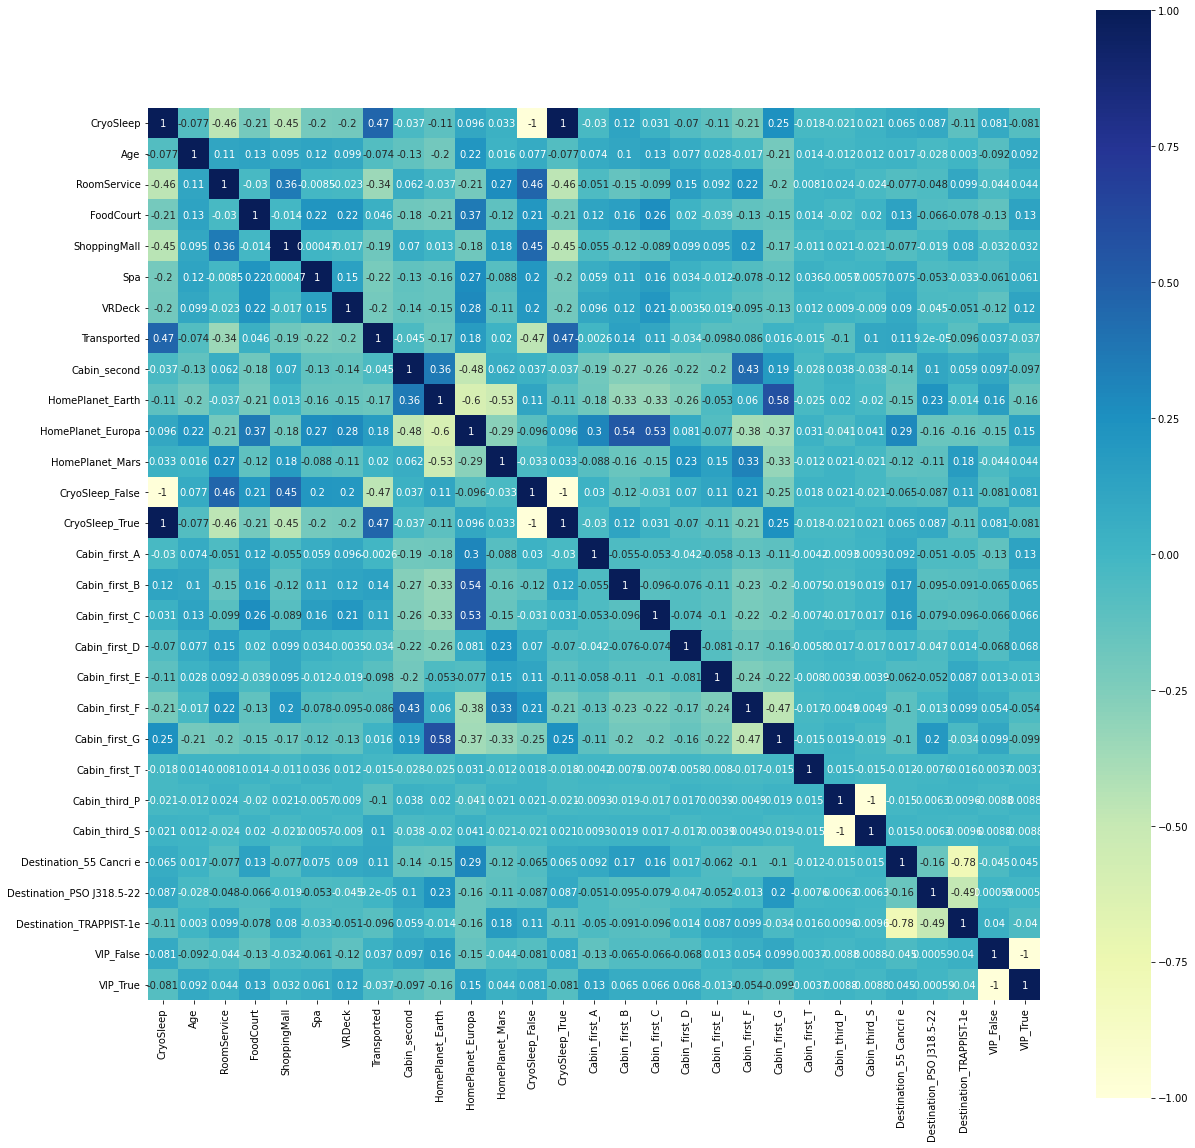

In [ ]:
import seaborn as sns
plt.subplots(figsize=(20,20))
sns.heatmap(train.corr(), mask=np.zeros_like(train.corr(), dtype=bool),
            square=True, annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 8492 non-null   object 
 1   CryoSleep                  8693 non-null   bool   
 2   Destination                8693 non-null   object 
 3   Age                        8693 non-null   float64
 4   VIP                        8693 non-null   object 
 5   RoomService                8693 non-null   float64
 6   FoodCourt                  8693 non-null   float64
 7   ShoppingMall               8693 non-null   float64
 8   Spa                        8693 non-null   float64
 9   VRDeck                     8693 non-null   float64
 10  Transported                8693 non-null   bool   
 11  Cabin_first                8693 non-null   object 
 12  Cabin_second               8693 non-null   float64
 13  Cabin_third                8693 non-null   objec

## test 데이터도 똑같이 처리

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4277 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
test = test.drop('PassengerId', axis = 1)
test = test.drop('Name', axis = 1)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4277 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
dtypes: float64(6), object(5)
memory usage: 367.7+ KB


In [ ]:
test['HomePlanet'] = test['HomePlanet'].fillna("Earth")
test['HomePlanet'].isnull().sum()

0

In [ ]:
test['CryoSleep'].value_counts()

False    2695
True     1582
Name: CryoSleep, dtype: int64

In [ ]:
# test['CryoSleep'] = test['CryoSleep'].fillna(False)
# test['CryoSleep'].value_counts()
test.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin           100
Destination      92
Age              91
VIP              93
RoomService       0
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [ ]:
test['Destination'].value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [ ]:
test['Destination'] = test['Destination'].fillna("TRAPPIST-1e")
test['Destination'].value_counts()

TRAPPIST-1e      3048
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [ ]:
cnt = 0
test["Cabin_first"] = 0
test["Cabin_second"] = 0
test["Cabin_third"] = 0

for element in test["Cabin"]:
  # print(cnt, element)
  if element is np.NaN:
    test['Cabin_first'][cnt] = np.NaN
    test['Cabin_second'][cnt] = np.NaN
    test['Cabin_third'][cnt] = np.NaN
    cnt+=1
    continue
  test['Cabin_first'][cnt] = element.split('/')[0]
  test['Cabin_second'][cnt] = element.split('/')[1]
  test['Cabin_third'][cnt] = element.split('/')[2]
  cnt += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/li

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4277 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Cabin_first   4177 non-null   object 
 12  Cabin_second  4177 non-null   float64
 13  Cabin_third   4177 non-null   object 
dtypes: float64(7), object(7)
memory usage: 467.9+ KB


In [ ]:
test['Cabin_first'].value_counts()

F    1445
G    1222
E     447
B     362
C     355
D     242
A      98
T       6
Name: Cabin_first, dtype: int64

In [ ]:
test['Cabin_first'] = test['Cabin_first'].fillna("F")
test['Cabin_first'].value_counts()

F    1545
G    1222
E     447
B     362
C     355
D     242
A      98
T       6
Name: Cabin_first, dtype: int64

In [ ]:
test['Cabin_second'].mean()

610.178836485516

In [ ]:
test['Cabin_second'] = test['Cabin_second'].fillna(test['Cabin_second'].mean())
test['Cabin_second'].isnull().sum()

0

In [ ]:
test['Cabin_third'].value_counts() 

S    2093
P    2084
Name: Cabin_third, dtype: int64

In [ ]:
train['Cabin_third'].value_counts()

S    4487
P    4206
Name: Cabin_third, dtype: int64

In [ ]:
test['Cabin_third'] = test['Cabin_third'].fillna("S")
test['Cabin_third'].value_counts()

S    2193
P    2084
Name: Cabin_third, dtype: int64

In [ ]:
test['VIP'].value_counts()

False    4110
True       74
Name: VIP, dtype: int64

In [ ]:
test['VIP'] = test['VIP'].fillna(False)
test["VIP"].value_counts()

False    4203
True       74
Name: VIP, dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4277 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4277 non-null   bool   
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Cabin_first   4277 non-null   object 
 12  Cabin_second  4277 non-null   float64
 13  Cabin_third   4277 non-null   object 
dtypes: bool(1), float64(7), object(6)
memory usage: 438.7+ KB


In [ ]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['RoomService'] = test['RoomService'].fillna(test['RoomService'].mean())
test['FoodCourt'] = test['FoodCourt'].fillna(test['FoodCourt'].mean())
test['ShoppingMall'] = test['ShoppingMall'].fillna(test['ShoppingMall'].mean())
test['Spa'] = test['Spa'].fillna(test['Spa'].mean())
test['VRDeck'] = test['VRDeck'].fillna(test['VRDeck'].mean())

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   bool   
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
 11  Cabin_first   4277 non-null   object 
 12  Cabin_second  4277 non-null   float64
 13  Cabin_third   4277 non-null   object 
dtypes: bool(1), float64(7), object(6)
memory usage: 438.7+ KB


In [ ]:
HomePlanet_dummmies = pd.get_dummies(test['HomePlanet'], prefix = 'HomePlanet')
CryoSleep_dummmies = pd.get_dummies(test['CryoSleep'], prefix = 'CryoSleep')
Cabin_first_dummmies = pd.get_dummies(test['Cabin_first'], prefix = 'Cabin_first')
Cabin_third_dummmies = pd.get_dummies(test['Cabin_third'], prefix = 'Cabin_third')
Destination_dummmies = pd.get_dummies(test['Destination'], prefix = 'Destination')
VIP_dummmies = pd.get_dummies(test['VIP'], prefix = 'VIP')

test = pd.concat((test, HomePlanet_dummmies), axis=1)
test = pd.concat((test, CryoSleep_dummmies), axis=1)
test = pd.concat((test, Cabin_first_dummmies), axis=1)
test = pd.concat((test, Cabin_third_dummmies), axis=1)
test = pd.concat((test, Destination_dummmies), axis=1)
test = pd.concat((test, VIP_dummmies), axis=1 )


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 4277 non-null   object 
 1   CryoSleep                  4277 non-null   object 
 2   Cabin                      4177 non-null   object 
 3   Destination                4277 non-null   object 
 4   Age                        4277 non-null   float64
 5   VIP                        4277 non-null   bool   
 6   RoomService                4277 non-null   float64
 7   FoodCourt                  4277 non-null   float64
 8   ShoppingMall               4277 non-null   float64
 9   Spa                        4277 non-null   float64
 10  VRDeck                     4277 non-null   float64
 11  Cabin_first                4277 non-null   object 
 12  Cabin_second               4277 non-null   float64
 13  Cabin_third                4277 non-null   objec

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 8492 non-null   object 
 1   CryoSleep                  8693 non-null   bool   
 2   Destination                8693 non-null   object 
 3   Age                        8693 non-null   float64
 4   VIP                        8693 non-null   object 
 5   RoomService                8693 non-null   float64
 6   FoodCourt                  8693 non-null   float64
 7   ShoppingMall               8693 non-null   float64
 8   Spa                        8693 non-null   float64
 9   VRDeck                     8693 non-null   float64
 10  Transported                8693 non-null   bool   
 11  Cabin_first                8693 non-null   object 
 12  Cabin_second               8693 non-null   float64
 13  Cabin_third                8693 non-null   objec

In [ ]:
train_list = train.columns
train_list

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Cabin_first', 'Cabin_second', 'Cabin_third', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Cabin_first_A', 'Cabin_first_B', 'Cabin_first_C',
       'Cabin_first_D', 'Cabin_first_E', 'Cabin_first_F', 'Cabin_first_G',
       'Cabin_first_T', 'Cabin_third_P', 'Cabin_third_S',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True'],
      dtype='object')

In [ ]:
train_list = [     'Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'Cabin_second', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Cabin_first_A', 'Cabin_first_B',
       'Cabin_first_C', 'Cabin_first_D', 'Cabin_first_E', 'Cabin_first_F',
       'Cabin_first_G', 'Cabin_first_T', 'Cabin_third_P',
       'Cabin_third_S', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True'
]

In [ ]:
X = train[train_list]
Y = train['Transported']

In [ ]:
X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_second,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_first_F,Cabin_first_G,Cabin_first_T,Cabin_third_P,Cabin_third_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.493671,0.000000,0.0,-0.615468,0.0,0.0,0.0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
1,0.303797,10.440307,9.0,0.316171,549.0,44.0,0.0,1,0,0,...,1,0,0,0,1,0,0,1,1,0
2,0.734177,6.557439,3576.0,-0.615468,6715.0,49.0,0.0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
3,0.417722,0.000000,1283.0,1.840450,3329.0,193.0,0.0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
4,0.202532,14.989584,70.0,1.840450,565.0,2.0,1.0,1,0,0,...,1,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.518987,0.000000,6819.0,-0.615468,1643.0,74.0,98.0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
8689,0.227848,0.000000,0.0,-0.615468,0.0,0.0,1499.0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
8690,0.329114,0.000000,0.0,1.840450,1.0,0.0,1500.0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
8691,0.405063,0.000000,1049.0,-0.615468,353.0,3235.0,608.0,0,1,0,...,0,0,0,0,1,1,0,0,1,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   Cabin_second               8693 non-null   float64
 7   HomePlanet_Earth           8693 non-null   uint8  
 8   HomePlanet_Europa          8693 non-null   uint8  
 9   HomePlanet_Mars            8693 non-null   uint8  
 10  CryoSleep_False            8693 non-null   uint8  
 11  CryoSleep_True             8693 non-null   uint8  
 12  Cabin_first_A              8693 non-null   uint8  
 13  Cabin_first_B              8693 non-null   uint8

In [ ]:
Y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [ ]:
# train 및 test 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.1) # 9:1

In [ ]:
x_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_second,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_first_F,Cabin_first_G,Cabin_first_T,Cabin_third_P,Cabin_third_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
1432,0.392405,14.989584,0.0,-0.429140,0.0,0.0,291.0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
6858,0.329114,0.000000,896.0,-0.615468,690.0,1.0,225.0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
4436,0.303797,0.000000,0.0,-0.615468,0.0,0.0,765.0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
7230,0.417722,0.000000,0.0,-0.615468,436.0,224.0,507.0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
2992,0.265823,14.989584,0.0,1.840450,589.0,0.0,104.0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.227848,3.741657,2.0,1.840450,610.0,0.0,988.0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
5191,0.632911,14.989584,0.0,0.405091,762.0,428.0,1063.0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
5390,0.278481,14.989584,0.0,1.840450,0.0,26.0,1194.0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
860,0.430380,14.989584,0.0,1.840450,0.0,0.0,191.0,0,0,1,...,1,0,0,1,0,0,0,1,1,0


In [ ]:
x_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_second,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_first_F,Cabin_first_G,Cabin_first_T,Cabin_third_P,Cabin_third_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
304,0.240506,14.989584,349.0,1.840450,3.000000,1057.0,63.0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
2697,0.227848,2.000000,904.0,-0.615468,0.000000,1.0,460.0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
8424,0.518987,0.000000,0.0,-0.615468,0.000000,0.0,1449.0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
1672,0.443038,0.000000,338.0,1.840450,311.138778,0.0,291.0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
8458,0.544304,0.000000,0.0,-0.615468,0.000000,0.0,288.0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0.177215,14.989584,0.0,0.106176,0.000000,0.0,440.0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
5023,0.050633,0.000000,0.0,-0.615468,0.000000,0.0,209.0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
5824,0.531646,0.000000,0.0,-0.615468,0.000000,0.0,998.0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
4716,0.455696,0.000000,52.0,-0.088454,0.000000,4160.0,824.0,1,0,0,...,0,1,0,0,1,0,0,1,1,0


In [ ]:
y_train

1432    False
6858     True
4436    False
7230     True
2992    False
        ...  
5734     True
5191    False
5390    False
860     False
7270    False
Name: Transported, Length: 7823, dtype: bool

In [ ]:
y_test

304      True
2697    False
8424    False
1672     True
8458     True
        ...  
6307    False
5023     True
5824     True
4716    False
8582    False
Name: Transported, Length: 870, dtype: bool

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# model = XGBClassifier()
model = LGBMClassifier()
model.fit(x_train, y_train)
test_pred = model.predict(x_test)

acc = 0 
total = 0
for pred, y_test_1 in zip(test_pred, y_test):

  if (pred == y_test_1):
    acc += 1
  total+= 1

print(acc/total * 100)

78.16091954022988


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

models=[RandomForestClassifier(), KNeighborsClassifier(), BaggingClassifier(), GradientBoostingClassifier(), XGBClassifier(), LGBMClassifier(),
        AdaBoostClassifier(),  SVC(), SGDClassifier()
        ]
     
model_names=['RandomForest', 'KNeighbors', 'Bagging', 'GradientBoosting', 'XGB', 'LGBM',
             'AdaBoost', 'SVC', "SGD"
          ]

for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train, y_train)
    test_pred=clf.predict(x_test)

    acc = 0 
    total = 0
    for pred, y_test_1 in zip(test_pred, y_test):

      if (pred == y_test_1):
        acc += 1
      total+= 1

    print(models[model], ":", acc/total * 100)

RandomForestClassifier() : 77.24137931034483
KNeighborsClassifier() : 71.72413793103448
BaggingClassifier() : 77.1264367816092
GradientBoostingClassifier() : 78.27586206896552
XGBClassifier() : 78.96551724137932
LGBMClassifier() : 78.16091954022988
AdaBoostClassifier() : 76.55172413793103
SVC() : 67.70114942528735
SGDClassifier() : 61.264367816091955


In [ ]:
test_pred.shape

(870,)

In [ ]:
help(LGBMClassifier)

Help on class LGBMClassifier in module lightgbm.sklearn:

class LGBMClassifier(LGBMModel, sklearn.base.ClassifierMixin)
 |  LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True, importance_type='split', **kwargs)
 |  
 |  LightGBM classifier.
 |  
 |  Method resolution order:
 |      LGBMClassifier
 |      LGBMModel
 |      sklearn.base.BaseEstimator
 |      sklearn.base.ClassifierMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, X, y, sample_weight=None, init_score=None, eval_set=None, eval_names=None, eval_sample_weight=None, eval_class_weight=None, eval_init_score=None, eval_metric=None, early_stopping_rounds=None, verbose=True, feature_name='auto', cate

In [ ]:
y_test

304      True
2697    False
8424    False
1672     True
8458     True
        ...  
6307    False
5023     True
5824     True
4716    False
8582    False
Name: Transported, Length: 870, dtype: bool

In [ ]:
test_pred.shape

(870,)

In [ ]:
train_list

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Cabin_second',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'CryoSleep_False',
 'CryoSleep_True',
 'Cabin_first_A',
 'Cabin_first_B',
 'Cabin_first_C',
 'Cabin_first_D',
 'Cabin_first_E',
 'Cabin_first_F',
 'Cabin_first_G',
 'Cabin_first_T',
 'Cabin_third_P',
 'Cabin_third_S',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'VIP_False',
 'VIP_True']

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 4277 non-null   object 
 1   CryoSleep                  4277 non-null   object 
 2   Cabin                      4177 non-null   object 
 3   Destination                4277 non-null   object 
 4   Age                        4277 non-null   float64
 5   VIP                        4277 non-null   bool   
 6   RoomService                4277 non-null   float64
 7   FoodCourt                  4277 non-null   float64
 8   ShoppingMall               4277 non-null   float64
 9   Spa                        4277 non-null   float64
 10  VRDeck                     4277 non-null   float64
 11  Cabin_first                4277 non-null   object 
 12  Cabin_second               4277 non-null   float64
 13  Cabin_third                4277 non-null   objec

In [ ]:
test['Cabin_first_0'] = 0
test['Cabin_third_0'] = 0
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 4277 non-null   object 
 1   CryoSleep                  4277 non-null   object 
 2   Cabin                      4177 non-null   object 
 3   Destination                4277 non-null   object 
 4   Age                        4277 non-null   float64
 5   VIP                        4277 non-null   bool   
 6   RoomService                4277 non-null   float64
 7   FoodCourt                  4277 non-null   float64
 8   ShoppingMall               4277 non-null   float64
 9   Spa                        4277 non-null   float64
 10  VRDeck                     4277 non-null   float64
 11  Cabin_first                4277 non-null   object 
 12  Cabin_second               4277 non-null   float64
 13  Cabin_third                4277 non-null   objec

In [ ]:
real_test =  test[train_list]
real_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        4277 non-null   float64
 1   RoomService                4277 non-null   float64
 2   FoodCourt                  4277 non-null   float64
 3   ShoppingMall               4277 non-null   float64
 4   Spa                        4277 non-null   float64
 5   VRDeck                     4277 non-null   float64
 6   Cabin_second               4277 non-null   float64
 7   HomePlanet_Earth           4277 non-null   uint8  
 8   HomePlanet_Europa          4277 non-null   uint8  
 9   HomePlanet_Mars            4277 non-null   uint8  
 10  CryoSleep_False            4277 non-null   uint8  
 11  CryoSleep_True             4277 non-null   uint8  
 12  Cabin_first_A              4277 non-null   uint8  
 13  Cabin_first_B              4277 non-null   uint8

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   Cabin_second               8693 non-null   float64
 7   HomePlanet_Earth           8693 non-null   uint8  
 8   HomePlanet_Europa          8693 non-null   uint8  
 9   HomePlanet_Mars            8693 non-null   uint8  
 10  CryoSleep_False            8693 non-null   uint8  
 11  CryoSleep_True             8693 non-null   uint8  
 12  Cabin_first_A              8693 non-null   uint8  
 13  Cabin_first_B              8693 non-null   uint8

In [ ]:
result = model.predict(test[train_list])

In [ ]:
result.shape

(4277,)

In [ ]:
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [ ]:
submission['Transported'] =  result
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
submission.to_csv('SPACE.csv', index=False)